In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from os import makedirs

In [14]:
cm = torch.load(f"./with_speech/seedlings/1000/cm_1000.pt")

In [20]:
LABEL_ORDER = [
    'Watertap',
    'Walkfootsteps',
    'Vacuumcleaner',
    'Rain',
    'Purr',
    'Knock',
    'Babycry',
    'Airconditioning',
    'Clapping'
]

LABEL_ORDER_SPEECH = [
    'Watertap',
    'Walkfootsteps',
    'Vacuumcleaner',
    'Rain',
    'Purr',
    'Knock',
    'Babycry',
    'Airconditioning',
    'Male_speech',
    'Clapping',
    'Female_speech'
]

LABEL_ORDER_SPEECH_1000 = [
    'Watertap',
    'Walkfootsteps',
    'Vacuumcleaner',
    'Rain',
    'Purr',
    'Knock',
    'Babycry',
    'Airconditioning',
    'Male_speech',
    'Female_speech',
    'Clapping',
]

In [11]:
def plot_confusion_matrix(cm, corpus, duration, labels):
    labels = labels
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.imshow(cm)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_yticks(np.arange(len(labels)), labels=labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, round(float(cm[i, j])*100, 1),
                        ha="center", va="center", color="w")

    makedirs(f"./with_speech/{corpus}/figures", exist_ok=True)
    plt.savefig(f"./with_speech/{corpus}/figures/cm_{corpus}_{duration}.png", bbox_inches="tight")
    plt.show()


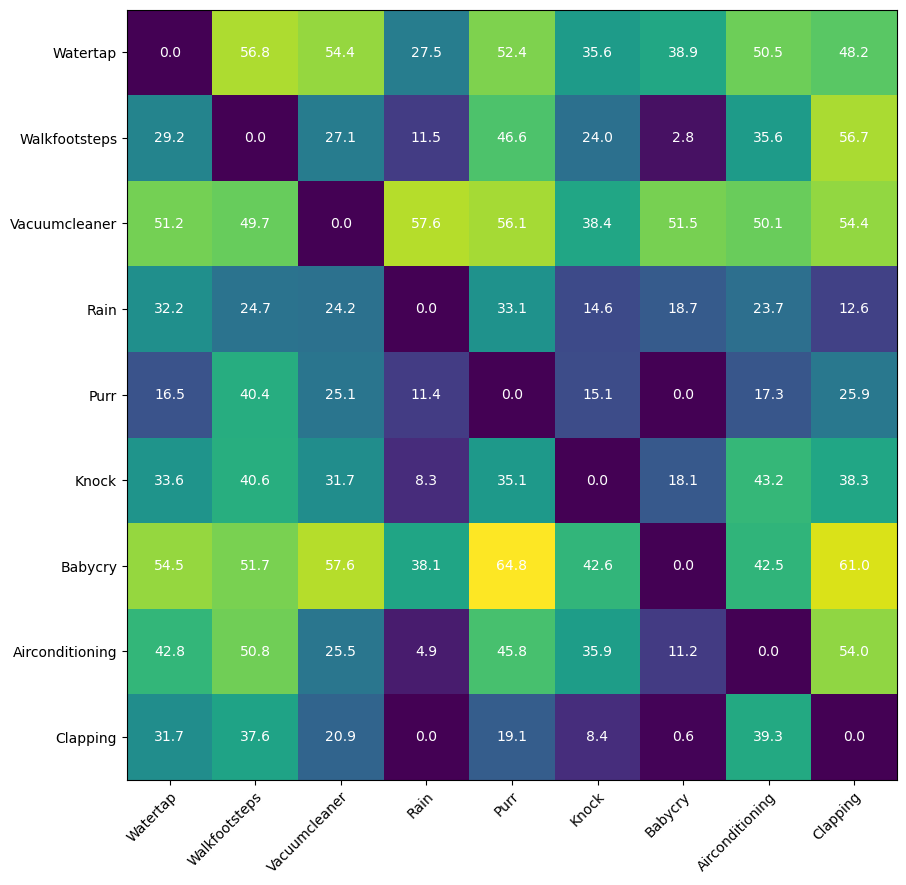

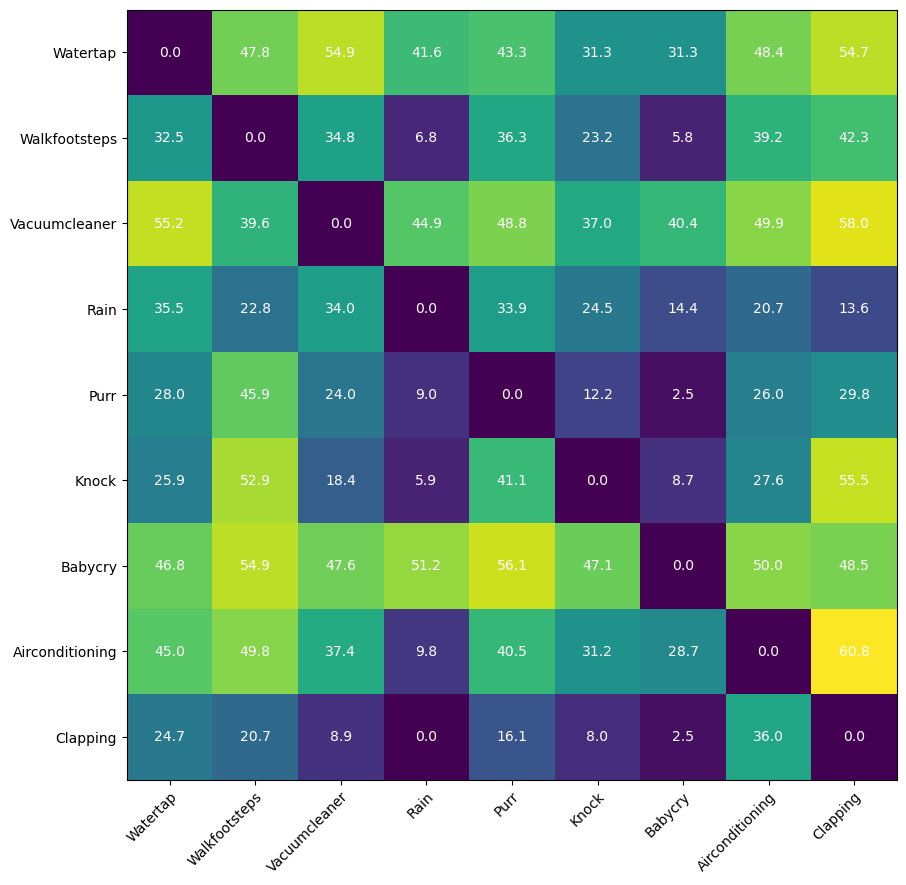

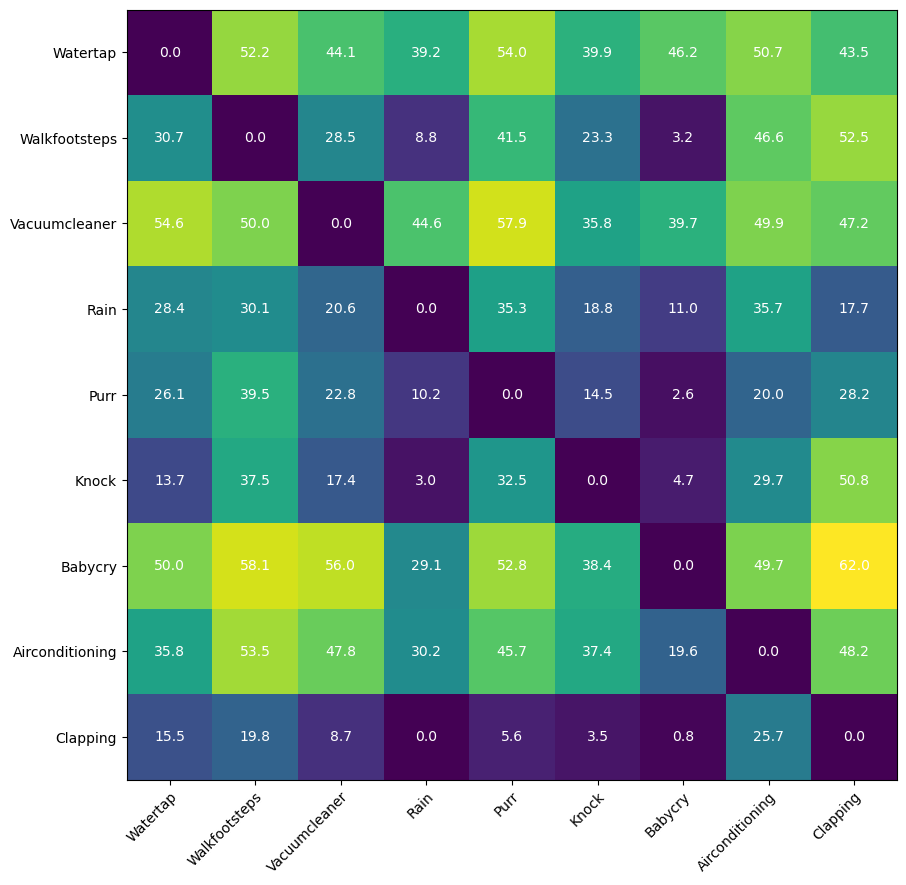

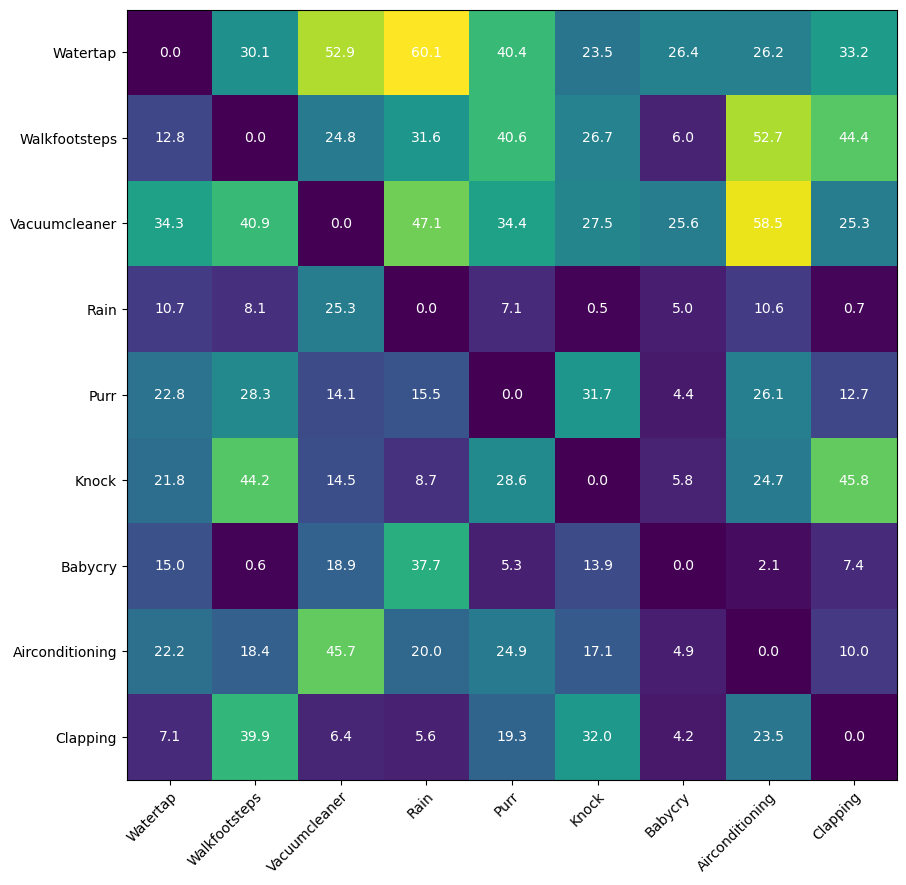

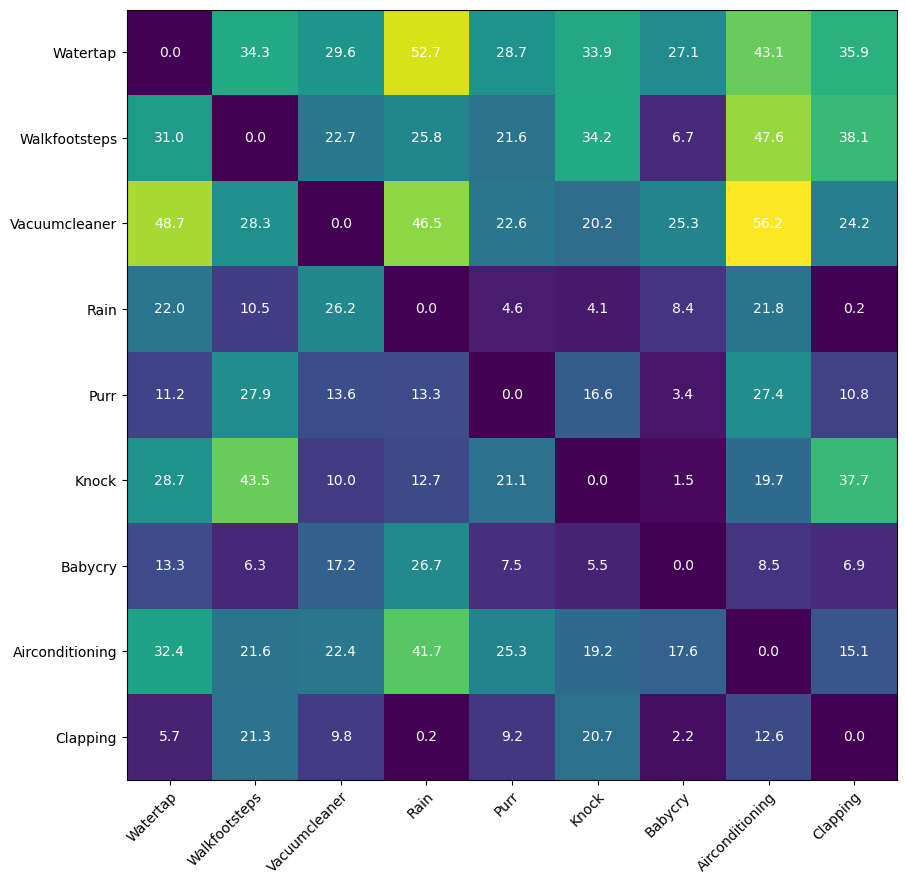

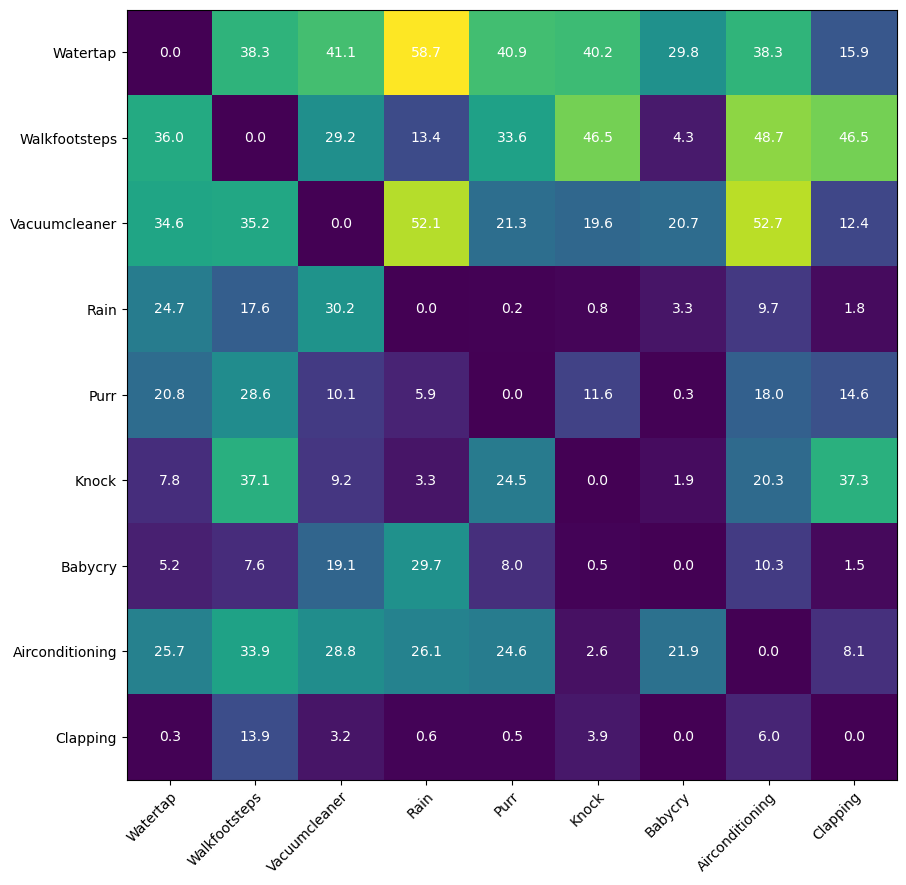

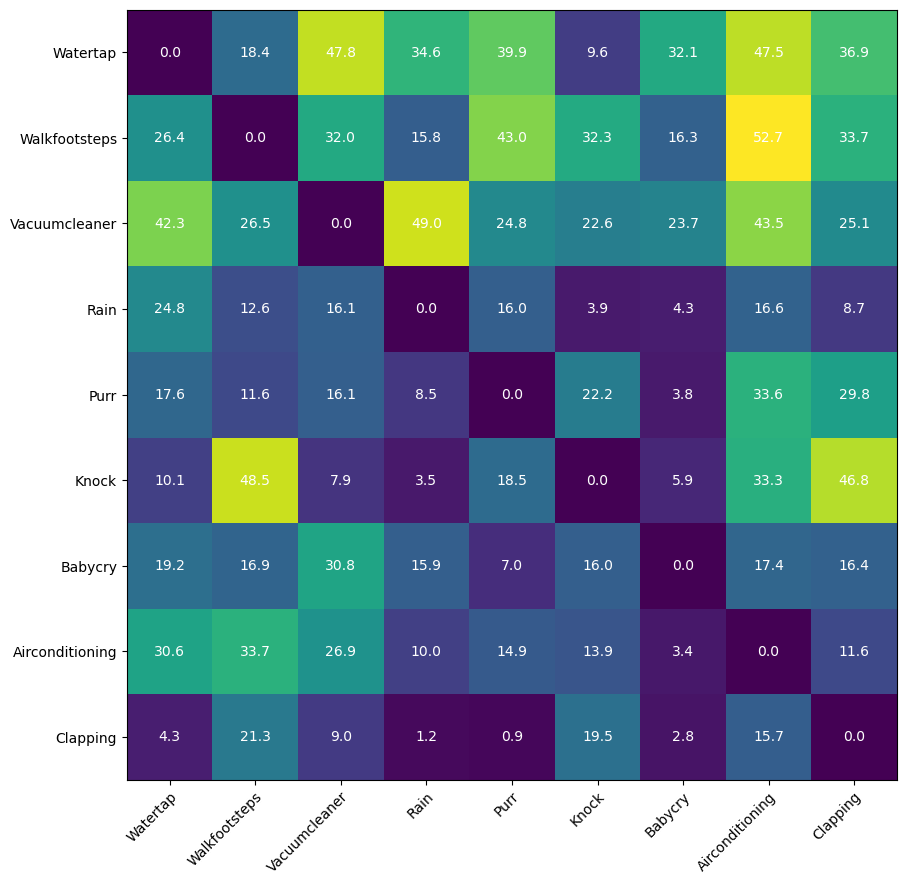

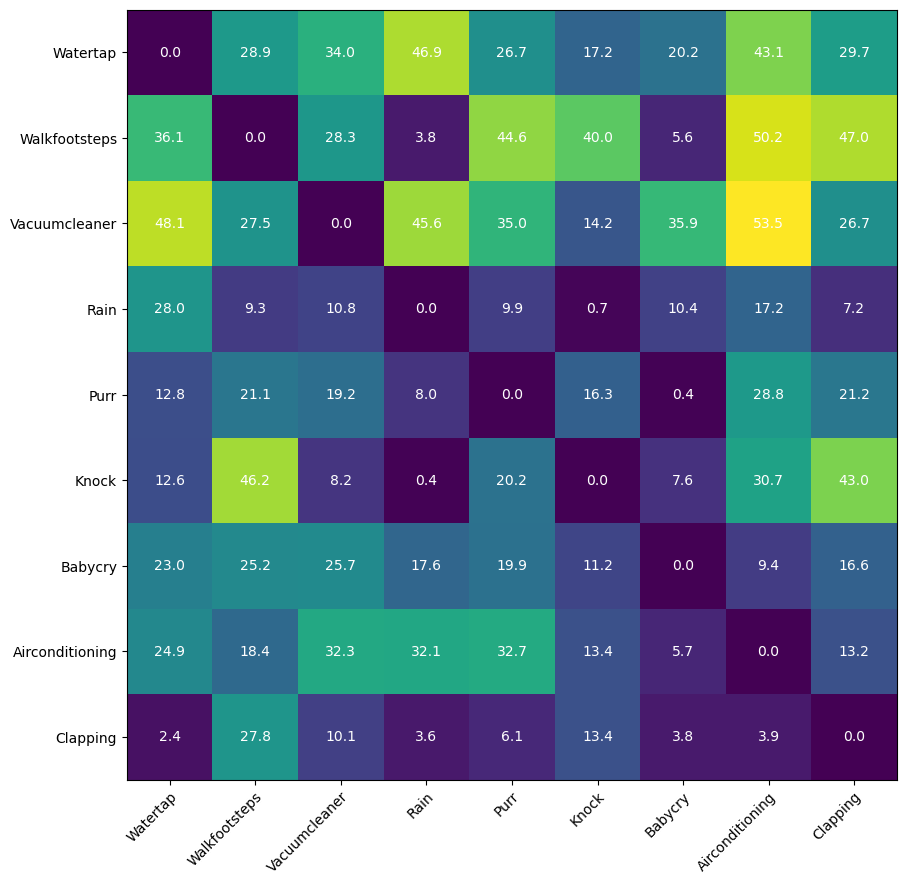

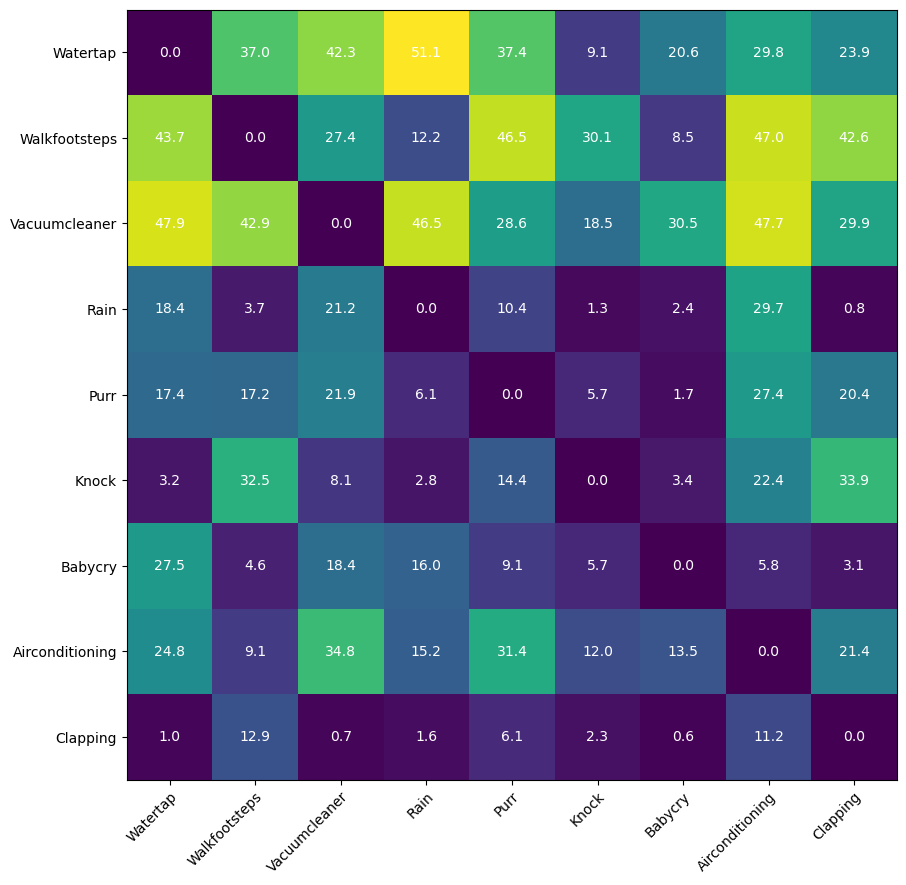

In [7]:
for corpus in ["mfccs", "librivox", "seedlings"]:
    for duration in [300, 500, 1000]:
        cm = torch.load(f"./{corpus}/{duration}/cm_{duration}.pt")
        plot_confusion_matrix(cm, corpus, duration, LABEL_ORDER)

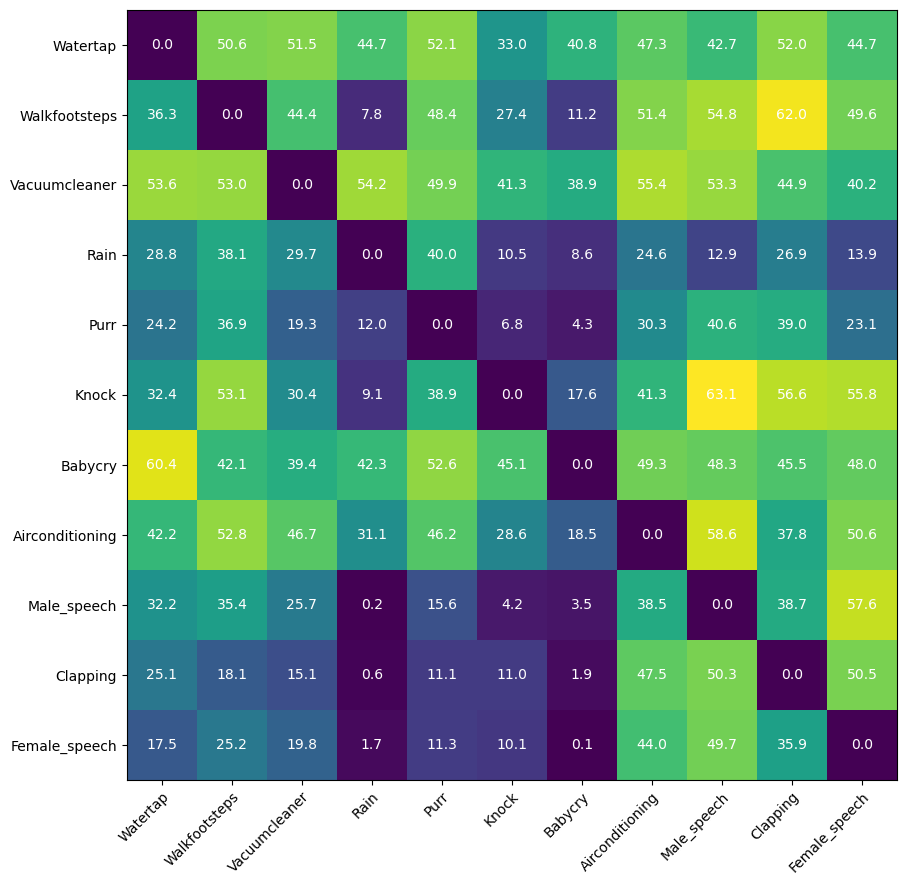

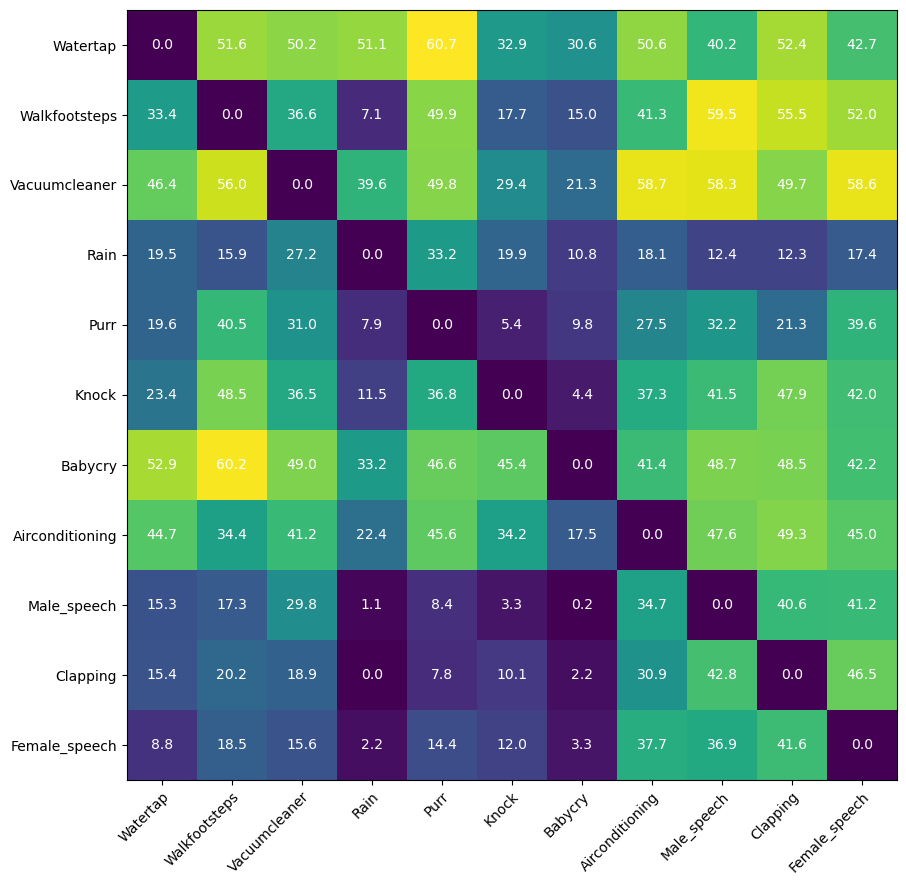

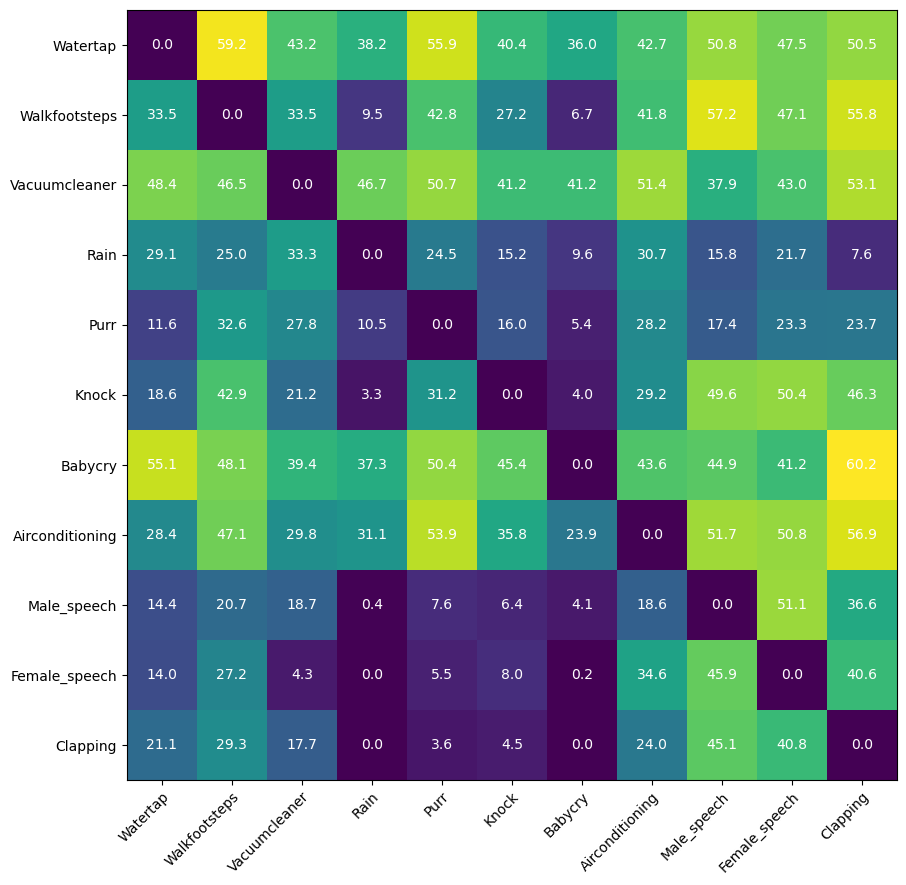

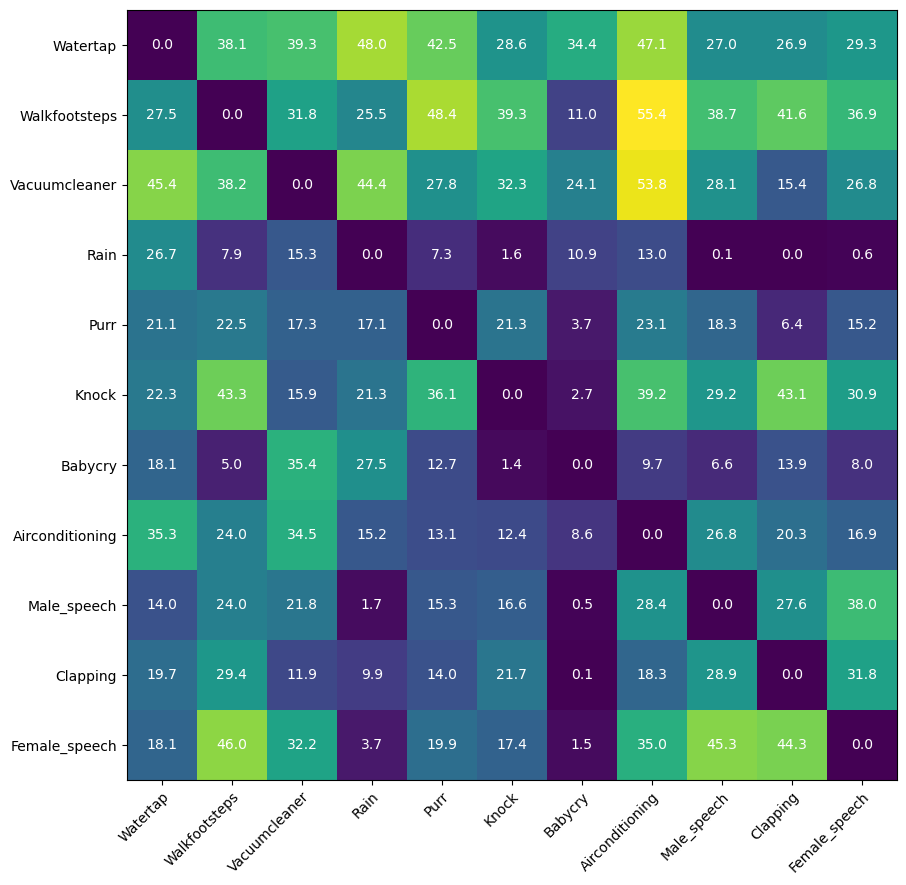

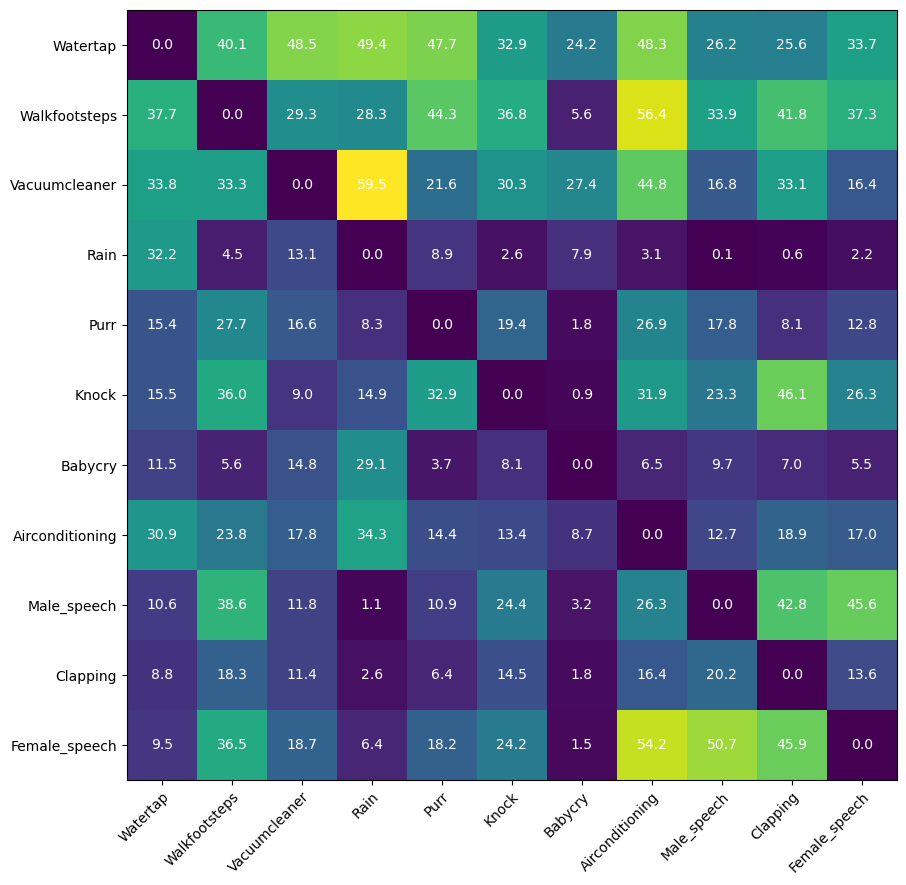

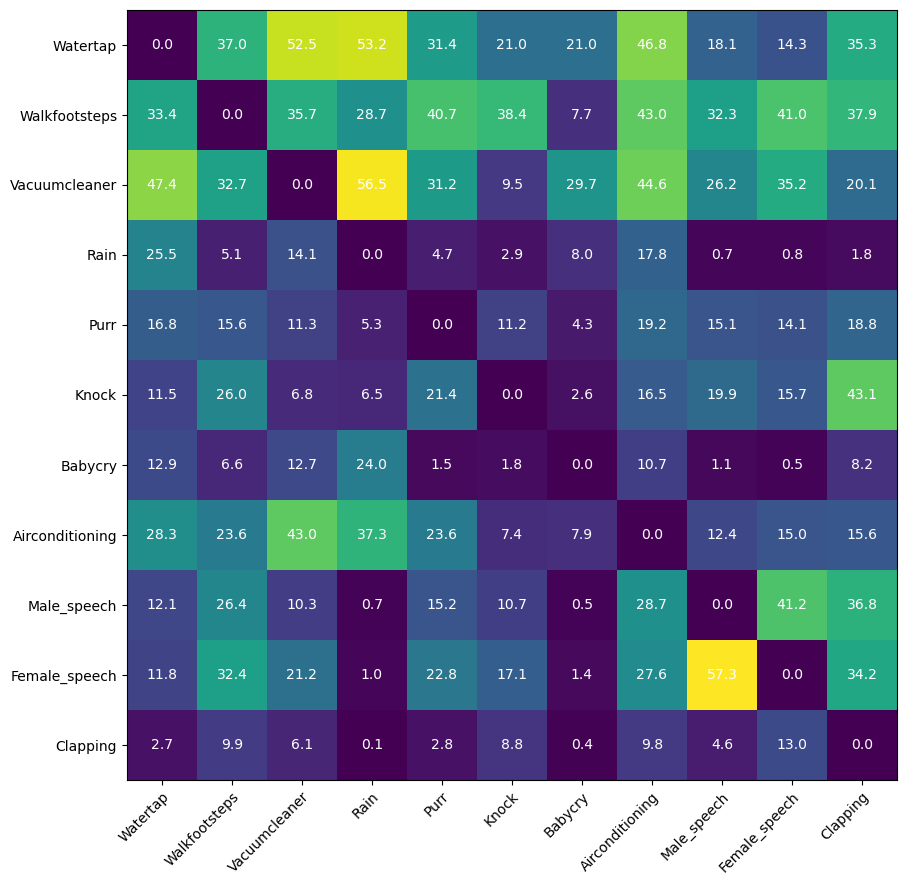

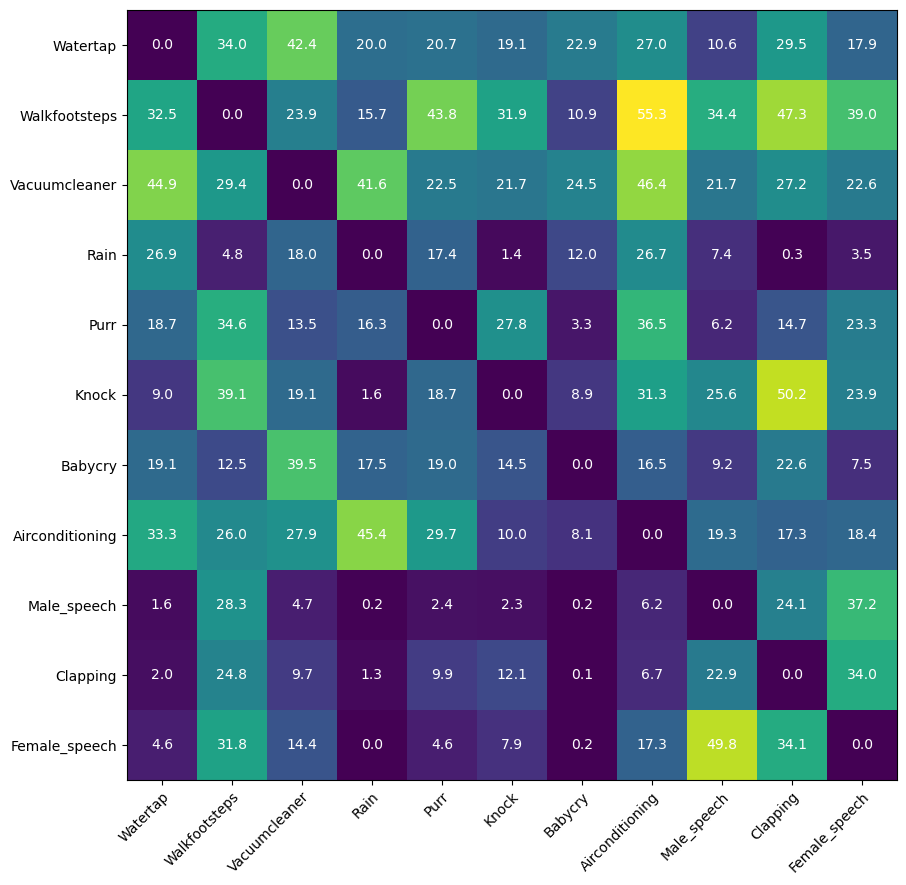

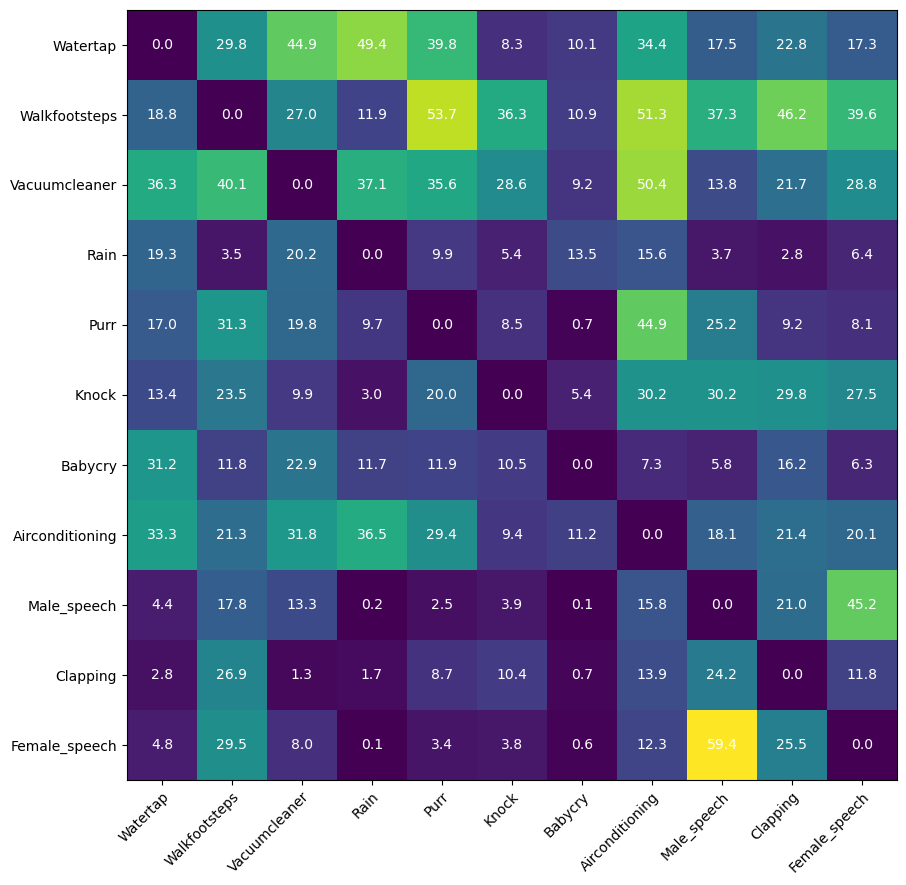

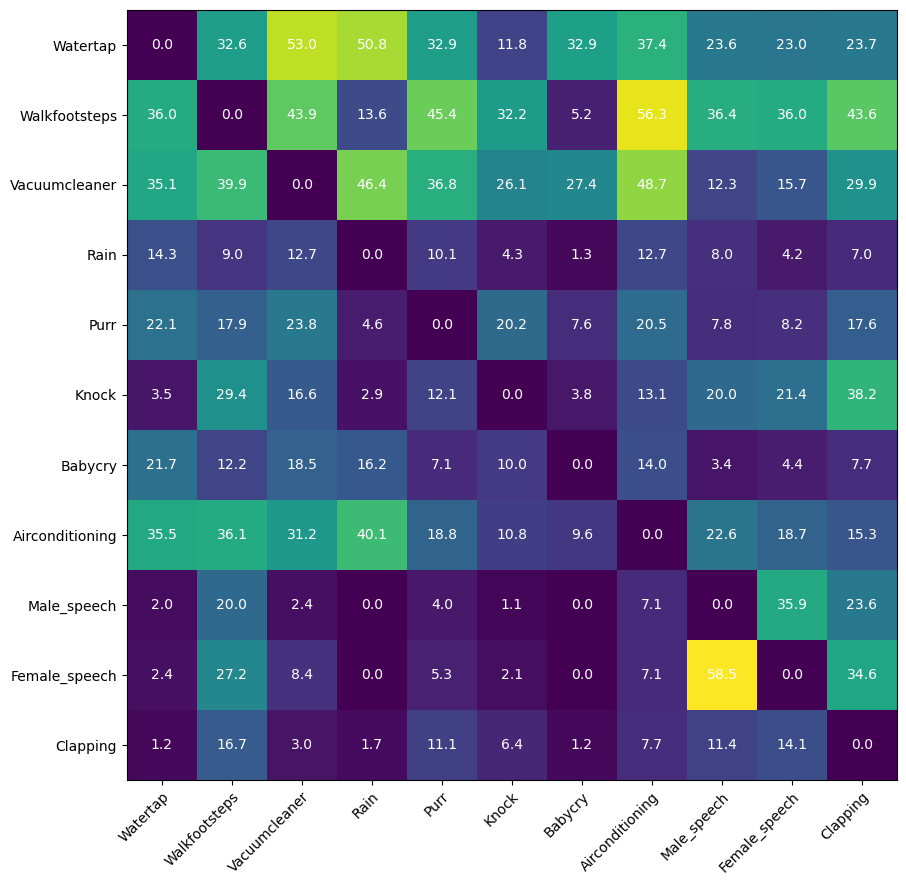

In [21]:
for corpus in ["mfccs", "librivox", "seedlings"]:
    for duration in [300, 500, 1000]:
        cm = torch.load(f"./with_speech/{corpus}/{duration}/cm_{duration}.pt")
        if duration == 1000:
            label_order = LABEL_ORDER_SPEECH_1000
        else:
            label_order = LABEL_ORDER_SPEECH
        plot_confusion_matrix(cm, corpus, duration, label_order)